
# Preprocessing 
### This Notebook takes an image and the output is the binarized Image with horizontal staff lines
### It takes care of the enhancement of the image and choosing apropriate threshold


In [2]:
from commonfunctions import *


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


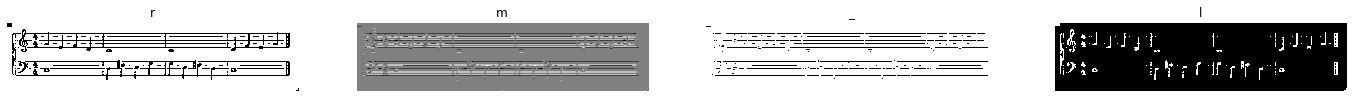

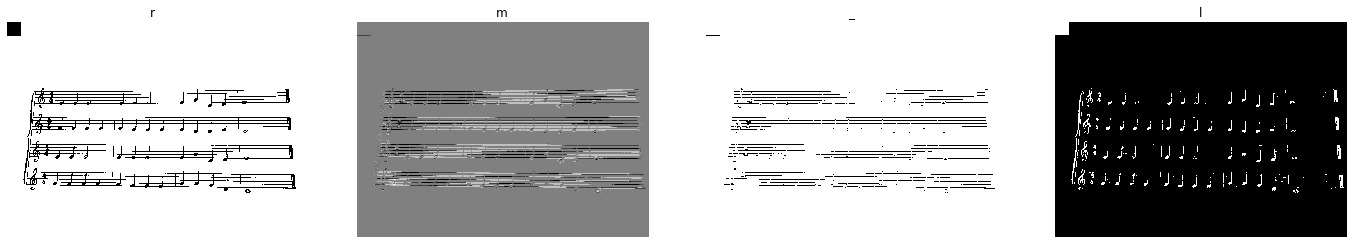

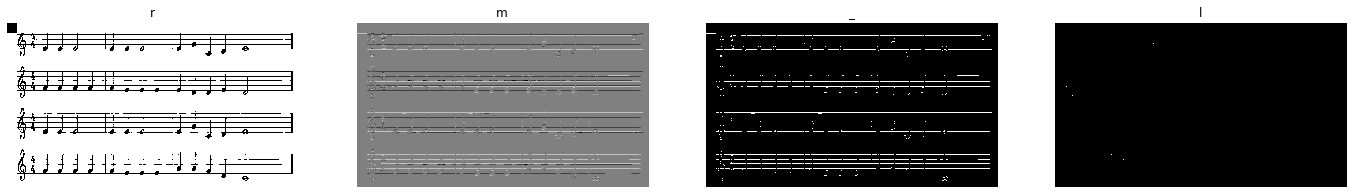

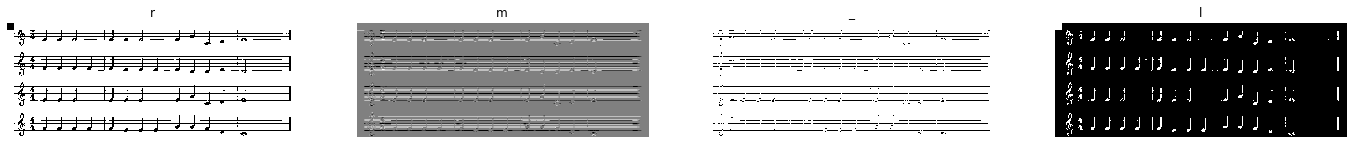

In [24]:
def rotate_img(image):
    new = np.array(np.where(image>0,0,1))
    tested_angles = np.linspace(-np.pi/2, np.pi/2, 360)
    origin = np.array((0,new.shape[1]))
    h, theta, d = hough_line(new, theta=tested_angles)
    th  = 0
#     ig, axes = plt.subplots(1, 3, figsize=(15, 6))
#     ax = axes.ravel()
#     ax[0].imshow(new, cmap=cm.gray)
    peaks = list(zip(*hough_line_peaks(h, theta, d)))
    _, angle, dist = np.median(peaks,axis = 0)
    y0,y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    th = math.atan((y1 - y0 )/(origin[1]))
#         ax[0].plot(origin, (y0,y1), '-r')
    if math.degrees(th) > 5 or math.degrees(th)< -5: 
        return np.where(binarize(rotate(new,math.degrees(th),preserve_range= True))>0,0,1)
    return np.where(new>0,0,1)
   

h_m =  [[-1,-1,-1],[2,2,2],[-1,-1,-1]]
def binarize(img):
    thr = threshold_otsu(img)
    return np.where(img > thr,1,0)

paths = [ '../../bex2.png', '../../bex3.png', '../../bex4.png', '../../bex5.png']
#paths = [ '../../bex4.png']
k = 1
for p in paths:
    img = io.imread(p)
    gray = rgb2gray(img)
    gray = (gray*255).astype('uint8')
    org = binraization(gray)
    # org = rotate_img(org)
    new = convolve(org, h_m, mode='constant', cval=0.0)
    binary = binarize(new)
    done = binary * np.where(org>0,0,1)
    show_images([org,new,binary,done],'rm_lines')

In [10]:
from scipy.signal import find_peaks
def getStuffLines(bin_img):
    hist = np.zeros(bin_img.shape[0])
    for i in range(bin_img.shape[0]):
        hist[i] = np.sum(np.where(bin_img[i,:]>0,0,1))
    # plt.figure()
    # plt.plot(np.arange(0,bin_img.shape[0],1),hist,label = 'hist')
    peaks, _ = find_peaks(hist, height = bin_img.shape[0]//2,distance=7)
    np.diff(peaks)
    # plt.plot(peaks, hist[peaks], "x")
    # plt.show()
    return peaks
def get_obj_properties(obj_y,img):
    stuff_lines_pos = getStuffLines(img)
    print(stuff_lines_pos)
    # get differece between object and lines
    diff = stuff_lines_pos - obj_y
    # get min difference disregarding the sign
    min_pos = np.where(np.absolute(diff) == np.min(np.absolute(diff)))
    #git closes line position
    closest_line_pos= stuff_lines_pos[min_pos]
    #get line above if negative and below if positive 
    sign = diff[min_pos]# distance between top of obejct and nearest line
    closest_line_num = np.where(stuff_lines_pos == closest_line_pos)[0]+1
    closest_line_num = closest_line_num[0]
    return closest_line_num, closest_line_pos, sign

img = io.imread('../../bex2.png')
gray = rgb2gray(img)
gray = (gray*255).astype('uint8')
org = binraization(gray)
obj_min_y = 22  # min y in contour 
obj_max_y = 40  # max y in contour
obj_type = 'reverse first type'

closest_line_num_top, closest_line_pos_top, sign_top= get_obj_properties(obj_min_y,org)
closest_line_num_d, closest_line_pos_d, sign_d= get_obj_properties(obj_max_y,org)

# print(closest_line_num_top)
# print(closest_line_pos_top) 
# print(sign_top) 

# print(closest_line_num_d)
# print(closest_line_pos_d) 
# print(sign_d)  

def get_org_txt(obj_type, closest_line_num_d, closest_line_pos_d, sign_d):
    if obj_type == 'first type':
        if sign_top  > 0 and sign_d == 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 4 == 0:#if obj top above line and object bottom on line 
            return 'a'
        elif sign_top  > 0 and sign_d < 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 4 == 0: #if obj top above line and object bottom below line 
            return 'g'
        elif sign_top  == 0 and sign_d == 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 5 == 0: #if obj top on line and object bottom on line 
            return 'f'
        elif sign_top  > 0 and sign_d < 0 and closest_line_num_top % 2 == 0 and closest_line_num_d % 5 == 0: #if obj top above line and object bottom below line 
            return 'e'   
        elif sign_top  == 0 and sign_d < 0 and closest_line_num_top % 2 == 0 and closest_line_num_d % 5 == 0: #if obj top on line and object bottom below line 
            return 'd' 
        elif sign_top  > 0 and sign_d < 0 and closest_line_num_top % 3 == 0 and closest_line_num_d % 5 == 0: #if obj top above line and object bottom below line 
            return 'c' 
    elif obj_type == 'reverse first type':
        if sign_top  > 0 and sign_d == 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 3 == 0:#if obj top above line and object bottom on line 
            return 'b2  '
        elif sign_top  > 0 and sign_d < 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 3 == 0:#if obj top above line and object bottom on line 
            return 'a2  '
        elif sign_top  > 0 and sign_d == 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 4 == 0:#if obj top above line and object bottom on line 
            return 'g2'
        elif sign_top  > 0 and sign_d < 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 4 == 0: #if obj top above line and object bottom below line 
            return 'f2'
        elif sign_top  == 0 and sign_d == 0 and closest_line_num_top % 1 == 0 and closest_line_num_d % 5 == 0: #if obj top on line and object bottom on line 
            return 'e2'
        elif sign_top  > 0 and sign_d < 0 and closest_line_num_top % 2 == 0 and closest_line_num_d % 5 == 0: #if obj top above line and object bottom below line 
            return 'd2'   
        elif sign_top  == 0 and sign_d < 0 and closest_line_num_top % 2 == 0 and closest_line_num_d % 5 == 0: #if obj top on line and object bottom below line 
            return 'c2' 
        elif sign_top  > 0 and sign_d < 0 and closest_line_num_top % 3 == 0 and closest_line_num_d % 5 == 0: #if obj top above line and object bottom below line 
            return 'b' 
    
org_txt = get_org_txt(obj_type,closest_line_num_d, closest_line_pos_d, sign_d)
print(org_txt)









FileNotFoundError: No such file: 'C:\Users\eslam\Desktop\IP project\bex2.png'

In [279]:
def deleteLines(binary,w):
    theta = np.arange(-math.pi,math.pi,0.01)
    max_R = math.sqrt(binary.shape[0]**2 +  binary.shape[1]**2)
    vote_mat = np.zeros((int(theta.size),int(round(max_R))))
    for row in range(binary.shape[0]):
        for col in range(binary.shape[1]):
             if binary[row,col]==1:
                for i in range(theta.size):
                    R = math.cos(theta[i]) * col + math.sin(theta[i]) * row
                    if  R < int(round(max_R)) and R >= 0:
                        vote_mat[i,int(R)]+=1
    for j in range(vote_mat.shape[0]):
        for k in range(vote_mat.shape[1]):
            if vote_mat[j,k] > 100:
                thval = theta[j]
                rval = k
                for i in range(binary.shape[1]):
                    x1 = i
                    y1 = int(round((rval - math.cos(thval)*x1)/ math.sin(thval)))
                    if not binary[y1-w:y1,x1].all() and not binary[y1:y1+w,x1].all():
                        binary[y1,x1] = 0
    show_images([binary],['line removed'])
    return binary

In [54]:
paths = ['../../ex1.png', '../../ex2.png', '../../ex3.png', '../../ex4.png', '../../ex5.png']
for i in paths:
# i = '../../ex4.png'
    img = sk.img_as_ubyte(rgb2gray(io.imread(i)))
    imgb = binraization(img)
    img = getStaffLines(imgb)
    show_images([img])

#     thr = fr.threshold_otsu(img)
#     binary = np.where(img>thr, 1, 0)
#     lines_rv = deleteLines(binary,3)
#     staffHeight, spaceHeight = getRefLengths(binary)


NameError: name 'getRefLengths' is not defined

rotation time:0.09771323204040527
binarization time:0.019977092742919922


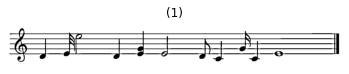

Ref lengths time:0.09677290916442871
staff removal time:3.5162558555603027
getting lines time:0.004502534866333008
segment image time:0.0
3 19
merging contours time:0.0009965896606445312
time: 3.8514022827148438 seconds
---------------------------------------------------------
rotation time:0.24733686447143555
binarization time:0.06286430358886719


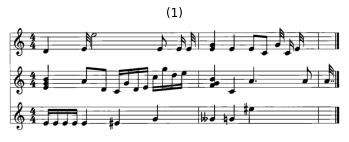

Ref lengths time:0.15059590339660645
staff removal time:7.45940375328064
getting lines time:0.003956794738769531
segment image time:0.000997781753540039
3 16
merging contours time:0.0
merging contours time:0.000997781753540039
merging contours time:0.0009975433349609375
time: 8.184693336486816 seconds
---------------------------------------------------------
rotation time:0.12581801414489746
binarization time:0.024007081985473633


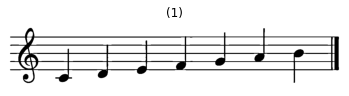

Ref lengths time:0.08840036392211914
staff removal time:3.859661817550659
getting lines time:0.0020041465759277344
segment image time:0.0
4 28
merging contours time:0.0009543895721435547
time: 4.183592319488525 seconds
---------------------------------------------------------
rotation time:0.08580517768859863
binarization time:0.02190852165222168


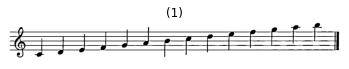

Ref lengths time:0.10973620414733887
staff removal time:3.6357741355895996
getting lines time:0.0020258426666259766
segment image time:0.0
3 17
merging contours time:0.0009658336639404297
time: 3.938995361328125 seconds
---------------------------------------------------------
rotation time:0.1220097541809082
binarization time:0.02396559715270996


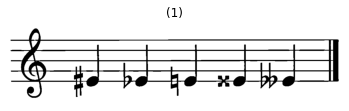

Ref lengths time:0.09371280670166016
staff removal time:5.33381199836731
getting lines time:0.0019943714141845703
segment image time:0.0
4 33
merging contours time:0.0009648799896240234
time: 5.66423225402832 seconds
---------------------------------------------------------
rotation time:0.07779264450073242
binarization time:0.026932954788208008


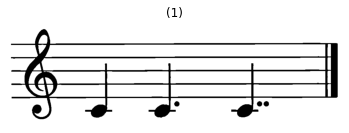

Ref lengths time:0.0817112922668457
staff removal time:6.704972982406616
getting lines time:0.0029921531677246094
segment image time:0.0
5 38
merging contours time:0.000997304916381836
time: 7.001136064529419 seconds
---------------------------------------------------------
rotation time:0.08281135559082031
binarization time:0.03786516189575195


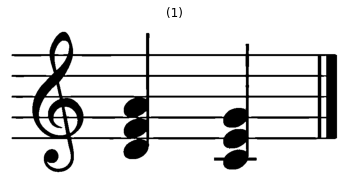

Ref lengths time:0.07779264450073242
staff removal time:2.69404673576355
getting lines time:0.001991748809814453
segment image time:0.0
5 49
merging contours time:0.0009684562683105469
time: 3.0430824756622314 seconds
---------------------------------------------------------
rotation time:0.07668590545654297
binarization time:0.029918432235717773


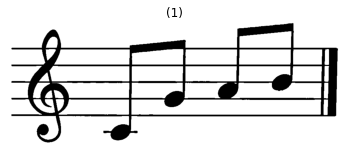

Ref lengths time:0.08928585052490234
staff removal time:3.4427943229675293
getting lines time:0.0019941329956054688
segment image time:0.0
5 44
merging contours time:0.0009970664978027344
time: 3.751382350921631 seconds
---------------------------------------------------------
rotation time:0.09275197982788086
binarization time:0.029919862747192383


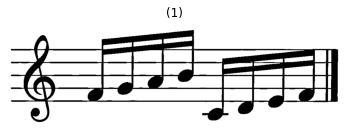

Ref lengths time:0.11967873573303223
staff removal time:2.7763378620147705
getting lines time:0.003024578094482422
segment image time:0.0009636878967285156
4 38
merging contours time:0.0
time: 3.1363742351531982 seconds
---------------------------------------------------------
rotation time:0.09347271919250488
binarization time:0.04761028289794922


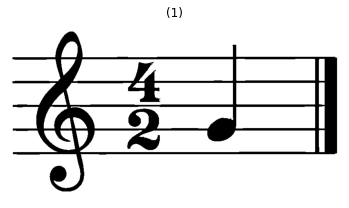

Ref lengths time:0.06980586051940918
staff removal time:3.937575101852417
getting lines time:0.001994609832763672
segment image time:0.0
6 51
merging contours time:0.0009975433349609375
time: 4.277372598648071 seconds
---------------------------------------------------------


In [189]:
images = load_images_from_folder("../test_cases/scanned/")
# images = [cv2.imread('../test_cases/04.PNG',0)]
# show_images([rotateImage(images[0])])

imNum = 0
for img in images:
    start_time = time.time()
    start = time.time()
    rotated = rotateImage(img)
    print('rotation time:' + str(time.time() - start))

    start = time.time()
    binary = binraization(rotated)//255
    print('binarization time:' + str(time.time() - start))
    
    show_images([binary])

    start = time.time()
    staffHeight, spaceHeight = getRefLengths(binary)
    print('Ref lengths time:' + str(time.time() - start))
    
    start = time.time()
    filteredImg, candidates = getCandidateStaffs(binary, staffHeight)
    filteredImg1, candidates, eliminated = RemoveThinStaffs(candidates, filteredImg, staffHeight)
    filteredImg2, candidates, eliminated = removeLonelyStaffs(candidates, binary, staffHeight, spaceHeight, eliminated)
    filteredImg3, candidates = addFalseNegatives(candidates, filteredImg2, staffHeight, staffHeight, eliminated)
    # print(filteredImg3)
    staffLess = (binary-filteredImg3).astype(np.uint8)
    print('staff removal time:' + str(time.time() - start))

    start = time.time()
    lines = getLines(1-filteredImg3, staffHeight, spaceHeight)
    print('getting lines time:' + str(time.time() - start))

    start = time.time()
    halfs = getHalfs(lines, spaceHeight, staffLess.shape[0])
    print('segment image time:' + str(time.time() - start))

    print(staffHeight, spaceHeight)

    for i in range(len(halfs) - 1):
        segment = staffLess[halfs[i]:halfs[i+1] + 1]
        
        start = time.time()
        mergedRects = getObjects(segment, staffHeight, spaceHeight)
        print('merging contours time:' + str(time.time() - start))
        
        cp = cv2.cvtColor(segment, cv2.COLOR_GRAY2BGR)
        
        for b in mergedRects:
            cv2.rectangle(cp, (b[0],b[1]), (b[2],b[3]), (0, 255, 0), 1)
        
        plt.imsave('image'+str(imNum)+'segment'+str(i)+'.png', cp)
    
    imNum += 1

    print("time: %s seconds" % (time.time() - start_time))
    print("---------------------------------------------------------")
    

In [26]:
images = load_images_from_folder("../test_cases/test/")
# images = [cv2.imread('../test_cases/test/18.jpg',0)]
i = 0
for img in images:
    start_time = time.time()
    start = time.time()
    rotated = rotateImage(img)
#     show_images([rotated])
    print('rotation time:' + str(time.time() - start))
    
    start = time.time()
    binary = binraization(rotated)//255
    print('binarization time:' + str(time.time() - start))
    
#     show_images([binary])

    start = time.time()
    staffHeight, spaceHeight = getRefLengths(binary)
    print('Ref lengths time:' + str(time.time() - start))
    
    start = time.time()

    filteredImg, candidates = getCandidateStaffs(binary, staffHeight)
    
    filteredImg, candidates, eliminated = removeLonelyStaffs(candidates, binary, staffHeight, spaceHeight, eliminated=[])

    staffLess = (binary-filteredImg).astype(np.uint8)
    
#     plt.imsave('staffless' + str(i) + '.png', staffLess)
#     show_images([staffLess])
    print('staff removal time:' + str(time.time() - start))

    start = time.time()
    lines = getLines(1-filteredImg, staffHeight, spaceHeight)
#     staff = cv2.cvtColor(staffLess, cv2.COLOR_GRAY2BGR)
#     staff[lines] = [0,0,255]
#     plt.imsave('staff' + str(i) +'.png', staff)
    print('getting lines time:' + str(time.time() - start))
    
    objects = segmentImage(staffLess, lines, staffHeight, spaceHeight, i)



#     o = objects[4]
#     show_images([staff[o[1]:o[3], o[0]:o[2]]])
#     character = getNoteCharacter(staffLess, o, 'a_32', lines, staffHeight, spaceHeight)
#     print(character)
    
#     o = objects[5]
#     show_images([staff[o[1]:o[3], o[0]:o[2]]])
#     character = getNoteCharacter(staffLess, o, 'a_2', lines, staffHeight, spaceHeight)
#     print(character)

#     o = objects[6]
#     show_images([staff[o[1]:o[3], o[0]:o[2]]])
#     character = getNoteCharacter(staffLess, o, 'a_8', lines, staffHeight, spaceHeight)
#     print(character)

#     o = objects[7]
#     show_images([staff[o[1]:o[3], o[0]:o[2]]])
#     character = getNoteCharacter(staffLess, o, 'a_16', lines, staffHeight, spaceHeight)
#     print(character)

#     o = objects[8]
#     show_images([staff[o[1]:o[3], o[0]:o[2]]])
#     character = getNoteCharacter(staffLess, o, 'a_32', lines, staffHeight, spaceHeight)
#     print(character)

#     o = objects[11]
#     show_images([staff[o[1]:o[3], o[0]:o[2]]])
#     character = getNoteCharacter(staffLess, o, 'a_4', lines, staffHeight, spaceHeight)
#     print(character)

#     o = objects[12]
#     show_images([staff[o[1]:o[3], o[0]:o[2]]])
#     character = getNoteCharacter(staffLess, o, 'beam', lines, staffHeight, spaceHeight)
#     print(character)

#     o = objects[13]
#     show_images([staff[o[1]:o[3], o[0]:o[2]]])
#     character = getNoteCharacter(staffLess, o, 'a_32', lines, staffHeight, spaceHeight)
#     print(character)

#     o = objects[14]
#     show_images([staff[o[1]:o[3], o[0]:o[2]]])
#     character = getNoteCharacter(staffLess, o, 'a_16', lines, staffHeight, spaceHeight)
#     print(character)

#     o = objects[15]
#     show_images([staff[o[1]:o[3], o[0]:o[2]]])
#     character = getNoteCharacter(staffLess, o, 'a_32', lines, staffHeight, spaceHeight)
#     print(character)

#     o = objects[23]
#     show_images([staff[o[1]:o[3], o[0]:o[2]]])
#     character = getNoteCharacter(staffLess, o, 'beam', lines, staffHeight, spaceHeight)
#     print(character)
    
#     o = objects[24]
#     show_images([staff[o[1]:o[3], o[0]:o[2]]])
#     character = getNoteCharacter(staffLess, o, 'beam', lines, staffHeight, spaceHeight)
#     print(character)
    
#     o = objects[25]
#     show_images([staff[o[1]:o[3], o[0]:o[2]]])
#     character = getNoteCharacter(staffLess, o, 'beam', lines, staffHeight, spaceHeight)
#     print(character)
    i += 1
    print("time: %s seconds" % (time.time() - start_time))
    print("---------------------------------------------------------")
    

rotation time:0.23332643508911133
binarization time:0.05503439903259277
Ref lengths time:0.2977433204650879
staff removal time:0.8501591682434082
getting lines time:0.005995035171508789
time: 1.484009027481079 seconds
---------------------------------------------------------
rotation time:0.5894641876220703
binarization time:0.14163804054260254
Ref lengths time:0.4011249542236328
staff removal time:2.6797478199005127
getting lines time:0.010171651840209961
time: 3.939401626586914 seconds
---------------------------------------------------------
rotation time:0.20497632026672363
binarization time:0.052643537521362305
Ref lengths time:0.2399430274963379
staff removal time:1.0944344997406006
getting lines time:0.00533604621887207
time: 1.668365478515625 seconds
---------------------------------------------------------
rotation time:0.3243544101715088
binarization time:0.05425262451171875
Ref lengths time:0.33426976203918457
staff removal time:1.0274124145507812
getting lines time:0.001029

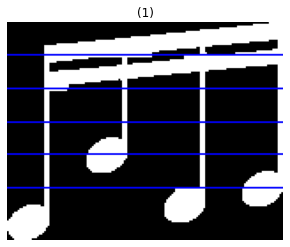

c/16 g/16 d/16 e/16


In [11]:
o = objects[24]
show_images([staff[o[1]:o[3], o[0]:o[2]]])
character = getNoteCharacter(staffLess, o, 'beam', lines, staffHeight, spaceHeight)
print(character)

rotation time:0.6037626266479492
binarization time:0.14151906967163086


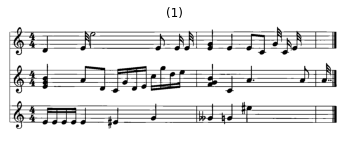

Ref lengths time:0.37407636642456055
staff removal time:1.9699347019195557
getting lines time:0.011953353881835938


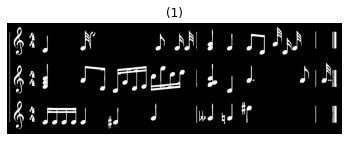

In [12]:
img = cv2.imread('../test_cases/02.PNG', 0)

start = time.time()
rotated = rotateImage(img)
print('rotation time:' + str(time.time() - start))

start = time.time()
binary = binraization(rotated)//255
print('binarization time:' + str(time.time() - start))

show_images([binary])
plt.imsave('binary.png', binary)

start = time.time()
staffHeight, spaceHeight = getRefLengths(binary)
print('Ref lengths time:' + str(time.time() - start))

start = time.time()

filteredImg, candidates = getCandidateStaffs(binary, staffHeight)
#     filteredImg1, candidates, eliminated = RemoveThinStaffs(candidates, filteredImg, staffHeight)

filteredImg, candidates, eliminated = removeLonelyStaffs(candidates, binary, staffHeight, spaceHeight, eliminated=[])

staffLess = (binary-filteredImg).astype(np.uint8)
print('staff removal time:' + str(time.time() - start))


start = time.time()
lines = getLines(1-filteredImg, staffHeight, spaceHeight)
print('getting lines time:' + str(time.time() - start))

show_images([staffLess])
plt.imsave('staffless.png', staffLess)

objects = segmentImage(staffLess, lines, staffHeight, spaceHeight)

In [95]:
# img = cv2.imread('../test_cases/02.PNG', 0)
# # show_images([img])
# # binary = binraization(img)/255
# # show_images([binary])
# img = rotateImage(img)
# # show_images([img])
# binary = binraization(img)/255
# # show_images([binary])

# staffHeight, spaceHeight = getRefLengths(binary)
# filteredImg, candidates = getCandidateStaffs(binary, staffHeight)
# filteredImg1, candidates, eliminated = RemoveThinStaffs(candidates, filteredImg, staffHeight)
# filteredImg2, candidates, eliminated = removeLonelyStaffs(candidates, binary, staffHeight, spaceHeight, eliminated)
# filteredImg3, candidates = addFalseNegatives(candidates, filteredImg2, staffHeight, staffHeight, eliminated)
# print(filteredImg3)
staffLess = (binary-filteredImg3).astype(np.uint8)

show_images([staffLess])

lines = getLines(1-filteredImg3,staffHeight, spaceHeight)
# print(peaks)
# normalized_sum = rows_sum/filteredImg3.shape[1]
# t = 0.5
detected_lines = np.zeros(rows_sum.shape)
detected_lines[lines] = 1

show_images([binary])

starts = np.array((detected_lines[:-1] == 1) & (detected_lines[1:] == 0))
starts_ix = np.where(starts)[0] + 1
ends = np.array((detected_lines[:-1] == 0) & (detected_lines[1:] == 1))
ends_ix = np.where(ends)[0]

starts_ix = starts_ix[:-1]
ends_ix = ends_ix[1:]

halfs = [0]

for i in range(len(starts_ix)):
    diff = ends_ix[i] - starts_ix[i]
    if diff > 2 * spaceHeight:
        halfs.append((ends_ix[i] + starts_ix[i])//2)

halfs.append(filteredImg3.shape[0]-1)

# closing = cv2.morphologyEx(staffLess, cv2.MORPH_CLOSE, kernel)

# show_images([closing])
# print(halfs)
staffLessWithLines = cv2.cvtColor(staffLess, cv2.COLOR_GRAY2BGR)

staffLessWithLines[lines] = [255,0,0]
# staffLessWithLines[lines-1] = [255,0,0]
# staffLessWithLines[lines+1] = [255,0,0]

show_images([staffLessWithLines])
for i in range(len(halfs) - 1):
    segment = staffLess[halfs[i]:halfs[i+1] + 1]
    segmentWithLines = staffLessWithLines[halfs[i]:halfs[i+1] + 1]

#     show_images([segment])
    contours, hierarchy = cv2.findContours(segment, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

#     cp = cv2.cvtColor(segment, cv2.COLOR_GRAY2BGR)

#     for c in contours:
#         (x,y,w,h) = cv2.boundingRect(c)
#         min_x, max_x = x, x+w
#         min_y, max_y = y, y+h
#         cv2.rectangle(cp, (min_x,min_y), (max_x,max_y), (0, 255, 0), 3)
    
#     show_images([cp])
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    boundingBoxes = sorted(boundingBoxes, key=lambda b: b[0])
    
    
    (x,y,w,h) = boundingBoxes[0]
    mergedBoxes = [(x,y,x+w,y+h)]
    j = 0
    for i in range(1, len(boundingBoxes)):
        (x,y,w,h) = boundingBoxes[i]
        old_x,old_y,old_x2,old_y2 = mergedBoxes[j]
        
        if x < old_x2 or h < spaceHeight:
            mergedBoxes[j] = (min(old_x,x), min(old_y,y), max(old_x2,x+w), max(old_y2,y+h))
        else:
            mergedBoxes.append((x,y,x+w,y+h))
            j += 1
    
    cp = cv2.cvtColor(segment, cv2.COLOR_GRAY2BGR)
#     print(spaceHeight)
    show_images([segment])
    for b in mergedBoxes:
        if (b[2] - b[0]) > 3 * spaceHeight:
            cv2.rectangle(cp, (b[0],b[1]), (b[2],b[3]), (0, 255, 0), 1)
    
            hists, numberOfBeams = getNoteHeads(segment, (b[0],b[1],b[2]-b[0],b[3]-b[1]), staffHeight, spaceHeight)
#             print(numberOfBeams)
            show_images([segmentWithLines[b[1]:b[3], b[0]:b[2]]])
            for h in hists:
                _, top, distanceTop = getNearestLine(h[2],lines)
                _, bottom, distanceBottom = getNearestLine(h[3],lines)
                print(top, distanceTop, bottom, distanceBottom)
                character = getHeadCharacter(top, distanceTop, bottom, distanceBottom, spaceHeight)
                division = int(8*numberOfBeams)
#                 print(character, division)
                print(character + '/' + str(division))
#                 cv2.circle(cp, (h[1], h[2]), 2, (0, 255, 0), -1)
#                 cv2.circle(cp, (h[1], h[3]), 2, (0, 0, 255), -1)
    
#     print(1)
#     show_images([cp])
    
#     show_images([cp])
    io.imsave('contours' + str(i) + '.png',cp)
    
#     print(boundingBoxes)
#     (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes),key=lambda b:b[1][i]))


# cp = cv2.cvtColor(staffLess, cv2.COLOR_GRAY2BGR)


# for c in contours:
#     (x,y,w,h) = cv2.boundingRect(c)
#     min_x, max_x = x, x+w
#     min_y, max_y = y, y+h
#     cv2.rectangle(cp, (min_x,min_y), (max_x,max_y), (255, 0, 0), 1)

# cp[halfs] = [0,0,255]
# # io.imsave('contours.png',cp)
# show_images([cp])
# io.imsave('removed.png',binary)

ValueError: operands could not be broadcast together with shapes (692,923) (574,1559) 

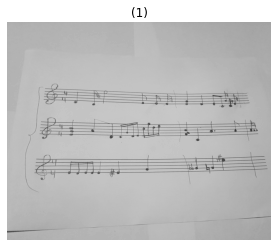

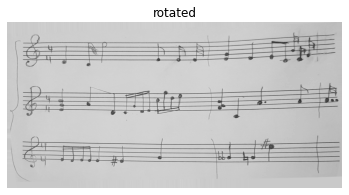

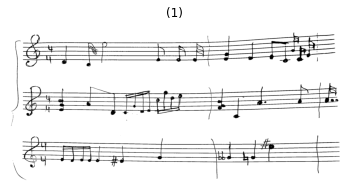

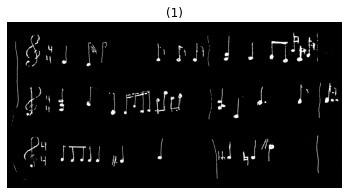

5 35


In [188]:
img = cv2.imread('../test_cases/12.jpg', 0)
imgName='10'
show_images([img])
# plt.imsave('img1.png', img)
# binary = binraization(img)//255
# show_images([binary])
img = rotateImage(img)
show_images([img], ["rotated"])
# plt.imsave('img2.png', img)

binary = binraization(img)//255
show_images([binary])

staffHeight, spaceHeight = getRefLengths(binary)
filteredImg, candidates = getCandidateStaffs(binary, staffHeight)
filteredImg1, candidates, eliminated = RemoveThinStaffs(candidates, filteredImg, staffHeight)
filteredImg2, candidates, eliminated = removeLonelyStaffs(candidates, binary, staffHeight, spaceHeight, eliminated)
filteredImg3, candidates = addFalseNegatives(candidates, filteredImg2, staffHeight, staffHeight, eliminated)
# print(filteredImg3)
staffLess = (binary-filteredImg3).astype(np.uint8)

show_images([staffLess])
plt.imsave('binary.png', binary)
plt.imsave('staffless.png', staffLess)

# start = time.time()
lines = getLines(1-filteredImg3, staffHeight, spaceHeight)
# print(time.time()-start)

cp = cv2.cvtColor(staffLess, cv2.COLOR_GRAY2BGR)
cp[lines] = [0,0,255]
plt.imsave('detectedLines.png', cp)


# start = time.time()
halfs = getHalfs(lines, spaceHeight, staffLess.shape[0])
# print(time.time()-start)

# total = time.time()
print(staffHeight, spaceHeight)

for i in range(len(halfs) - 1):
#     print(staffHeight, spaceHeight)
    segment = staffLess[halfs[i]:halfs[i+1] + 1]
#     show_images([segment])
#     start = time.time()
    mergedRects = getObjects(segment, staffHeight, spaceHeight)
    
    cp = cv2.cvtColor(segment, cv2.COLOR_GRAY2BGR)
    
    for b in mergedRects:
        cv2.rectangle(cp, (b[0],b[1]), (b[2],b[3]), (0, 255, 0), 1)
    
    plt.imsave('image'+imgName+'segment'+str(i)+'.png', cp)
#     break
#     break
#     print(time.time()-start)
# print(time.time()-total)    

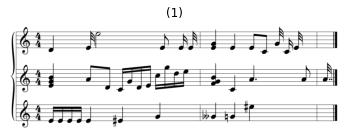

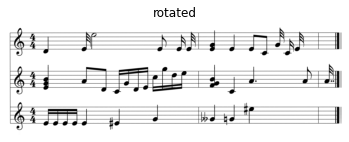

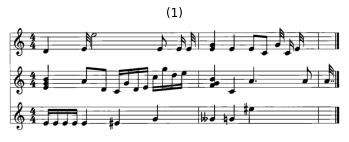

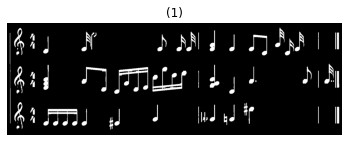

1
1
33 23 79 148
46 125
43 131 56 149
13 18

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False]
1
2
33 23 79 149
46 126
47 115 51 122
4 7

[False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False]
4
1
107 86 122 109
15 23
107 49 122 72
15 23

[False False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False]
4
2
107 86 122 109
15 23
118 92 127 118
9 26

[False False  True  True False False False False False False False False
 False False False False False False False False False False False False
 False]
4
3
107 86 127 118
20 32
118 55 127 81
9 26

[False False  True  True False False  True False False False False False
 False False False False False False False False False False False False
 False]
5
1
1

In [167]:
img = cv2.imread('../test_cases/scanned/02.PNG', 0)
imgName='10'
show_images([img])
# plt.imsave('img1.png', img)
# binary = binraization(img)//255
# show_images([binary])
img = rotateImage(img)
show_images([img], ["rotated"])
# plt.imsave('img2.png', img)

binary = binraization(img)//255
show_images([binary])

staffHeight, spaceHeight = getRefLengths(binary)
filteredImg, candidates = getCandidateStaffs(binary, staffHeight)
filteredImg1, candidates, eliminated = RemoveThinStaffs(candidates, filteredImg, staffHeight)
filteredImg2, candidates, eliminated = removeLonelyStaffs(candidates, binary, staffHeight, spaceHeight, eliminated)
filteredImg3, candidates = addFalseNegatives(candidates, filteredImg2, staffHeight, staffHeight, eliminated)
# print(filteredImg3)
staffLess = (binary-filteredImg3).astype(np.uint8)

show_images([staffLess])
plt.imsave('binary.png', binary)
plt.imsave('staffless.png', staffLess)

lines = getLines(1-filteredImg3, staffHeight, spaceHeight)

objects = segmentImage(staffLess, lines, staffHeight, spaceHeight)

for i in range(len(objects)):
    plt.imsave('objects/'+ str(i) + '.png', objects[i])

# show_images(objects)

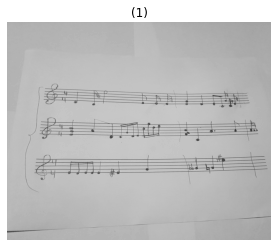

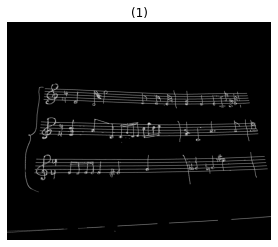

rho: 1726.0 theta: 89.999995674289
rho: 1766.0 theta: 89.999995674289
rho: 1730.0 theta: 89.999995674289
rho: 1808.0 theta: 89.999995674289
rho: 1686.0 theta: 89.999995674289
rho: 1689.0 theta: 89.999995674289
rho: 1769.0 theta: 89.999995674289
rho: 1811.0 theta: 89.999995674289


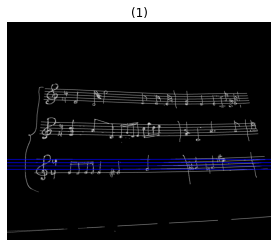

None


In [34]:
def needsRotation(img):
    width = img.shape[1]
    show_images([img])
    # plt.imsave('img1.png', img)
    # binary = binraization(img)//255
    # show_images([binary])
    # show_images([img], ["rotated"])
    # plt.imsave('img2.png', img)

    edges = cv2.Canny(img, 50, 200)

    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,2))
    # Dilate
    edges = cv2.dilate(edges,kernel,iterations=1)

    # print(edges)

    show_images([edges])

    cdst = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)
    # Detect points that form a line
    houghLines = cv2.HoughLines(edges,1,np.pi/180,int(width * 0.5))

    if houghLines is None:
        return True
        
    
    imgHoughLines = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

    filteredHoughLines = []
    
    houghLines[:,0]
    for rho,theta in houghLines[:,0]:
        if (1.4 < theta and theta < 1.8):
            filteredHoughLines.append([rho, theta])

    for rho,theta in filteredHoughLines:
        print('rho: ' + str(rho) + ' theta: ' + str(math.degrees(theta)))
        cosTheta = np.cos(theta)
        sinTheta = np.sin(theta)
        if (sinTheta == 0):
            continue
        x0 = cosTheta*rho
        y0 = sinTheta*rho
        y1 = int(y0 + x0/np.tan(theta))
        y2 = int(y0 + (x0 - (width-1))/np.tan(theta))

        cv2.line(imgHoughLines,(0,y1),(width-1,y2),(0,0,255),3)

    show_images([imgHoughLines])
    
img = cv2.imread('../test_cases/12.jpg', 0)

print(needsRotation(img))

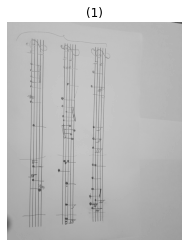

(3239, 2606)
156.0 1546.0 239.0 3083.0


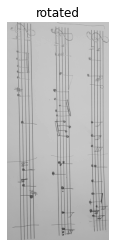

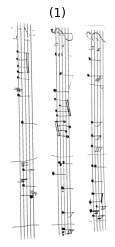

In [28]:
img = cv2.imread('../test_cases/16.jpg', 0)
show_images([img])
# plt.imsave('img1.png', img)
# binary = binraization(img)//255
# show_images([binary])
img = rotateImage(img)
show_images([img], ["rotated"])
# plt.imsave('img2.png', img)

binary = binraization(img)//255
show_images([binary])

staffHeight, spaceHeight = getRefLengths(binary)

In [ ]:
paths = ['../ex1.png', '../ex2.png', '../ex3.png', '../ex4.png', '../ex5.png', '../ex7.png', '../ex8.png']
scanned = ['01.PNG', '02.PNG', '03.PNG', '04.PNG', '05.PNG', '06.PNG', '07.PNG', '08.PNG', '09.PNG', '10.PNG']
for i in scanned:
# i = '../ex1.png'
    img = (cv2.imread('../databases/PublicTestCases/test-set-scanned/test-cases/'+i))
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    se = np.ones((1, 9))
    binary = binraization(gray)
    
    staffHeight, spaceHeight = getRefLengths(binary)
    filteredImg, candidates = getCandidateStaffs(binary, staffHeight)
#     filteredImg = binary_opening(filteredImg, se)
    filteredImg1, candidates, eliminated = RemoveThinStaffs(candidates, filteredImg, staffHeight)
    filteredImg2, candidates, eliminated = removeLonelyStaffs(candidates, binary, staffHeight, spaceHeight, eliminated)
    filteredImg3, candidates = addFalseNegatives(candidates, filteredImg2, staffHeight, staffHeight, eliminated)
    staffless = (binary-filteredImg3).astype(np.uint8)
    
    
    image, contours, hierarchy = cv2.findContours(staffless*255, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 
    original = img.copy()
    for c in contours:
        x, y, w, h = cv2.boundingRect(c)
        if h > spaceHeight*2 and w >= spaceHeight/2 and w <= 2*spaceHeight:
            cv2.rectangle(original, (x,y), (x+w, y+h), (0,255,0), 3)
            cv2.rectangle(staffless, (x,y), (x+w, y+h), 255, 3)

    cv2.imwrite('notes'+i, original)


In [8]:
def fillBridges(binary,staffless,offset = 5):
    img1 = staffless.copy()
    binary = np.where(binary>0,0,1)
    for i in range(staffless.shape[0] - offset): 
        for j in range(staffless.shape[1]- offset):
            if staffless[i,j] == 1 and staffless[i,j+offset] == 1:
                img1[i,j:j+offset] = binary[i,j:j+offset]
            if staffless[i,j] == 1 and staffless[i+offset,j] == 1:
                img1[i:i+offset,j] = binary[i:i+offset,j]
    return img1

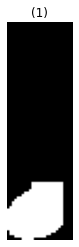

In [64]:
img = cv2.imread('../test_cases/beam.png', 0)
# show_images([img])
# binary = binraization(img)/255
# show_images([binary])
# img = rotateImage(img)
# show_images([img])
binary = binraization(img)/255
# show_images([binary])

staffHeight, spaceHeight = getRefLengths(binary)
print(staffHeight, spaceHeight)
filteredImg, candidates = getCandidateStaffs(binary, staffHeight)
filteredImg1, candidates, eliminated = RemoveThinStaffs(candidates, filteredImg, staffHeight)
filteredImg2, candidates, eliminated = removeLonelyStaffs(candidates, binary, staffHeight, spaceHeight, eliminated)
filteredImg3, candidates = addFalseNegatives(candidates, filteredImg2, staffHeight, staffHeight, eliminated)
# print(filteredImg3)
staffLess = (binary-filteredImg3).astype(np.uint8)//255

show_images([staffLess])


rows_sum = np.sum(1-filteredImg3, axis=1)

lines, _ = find_peaks(rows_sum, height = staffLess.shape[1]//2, distance=spaceHeight)
# print(peaks)
# normalized_sum = rows_sum/filteredImg3.shape[1]
# t = 0.5
detected_lines = np.zeros(rows_sum.shape)
detected_lines[lines] = 1

contours, hierarchy = cv2.findContours(staffLess, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)

largestContour = contours[0]
(x,y,w,h) = cv2.boundingRect(largestContour)
min_x, max_x = x, x+w
min_y, max_y = y, y+h

# cv2.rectangle(cp, (min_x,min_y), (max_x,max_y), (255, 0, 0), 1)
cp = cv2.cvtColor(staffLess*255, cv2.COLOR_GRAY2BGR)

start = time.time()

hists,beams = getNoteHeads(staffLess, (x,y,w,h), staffHeight, spaceHeight)

print(beams)

for h in hists:
    cv2.circle(cp, (h[1], h[2]), 2, (0, 255, 0), -1)
    cv2.circle(cp, (h[1], h[3]), 2, (0, 0, 255), -1)
    
    
# print(w)
# print(hist[hist[:,0] != 0])
print(time.time() - start)
# cp[peaks, :] = [255,255,255]
show_images([cp])
plt.imsave('test.png', cp)
# plt.plot(hist[:,0], range(w))
# plt.hist(hist[:,0], bins =w)
plt.bar(range(w), hist[:,0], width=0.5)
plt.show()



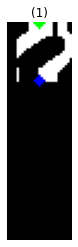

e2/2


In [188]:
# print(objects[10])
getNoteType(staffLess, objects[3], 'a_2', lines, staffHeight, spaceHeight)

In [189]:
def getNoteCharacter(originalImage, boundingRect, noteClass, lines, staffHeight, spaceHeight):
    img = originalImage.copy()
    
    (min_x,min_y,max_x,max_y) = boundingRect
    w = max_x - min_x
    h = max_y - min_y
    
    contourImage = img[min_y:max_y, min_x:max_x]
    
#     show_images([contourImage])
    character = ''
    
    if noteClass == 'a_1':
        noteTop = min_y
        noteBottom = max_y
        _, top, distanceTop = getNearestLine(noteTop,lines)
        _, bottom, distanceBottom = getNearestLine(noteBottom,lines)
        character = getHeadCharacter(top, distanceTop, bottom, distanceBottom, spaceHeight)
        character += '/1'
        return character
        
    elif noteClass == 'a_2':
        yprojection = np.sum(contourImage//255, axis=0)
        yprojection = np.where(yprojection>spaceHeight + 2*staffHeight)
        contourImage[:,yprojection] = 0
        
        a = np.sum(contourImage//255, axis=1)
    
        starts = np.array((a[:-1] == 0) & (a[1:] != 0))
        starts_ix = np.where(starts)[0] + 1
        ends = np.array((a[:-1] != 0) & (a[1:] == 0))
        ends_ix = np.where(ends)[0]

        if a[0] != 0:
            starts_ix = np.append(0, starts_ix)

        if a[-1] != 0:
            ends_ix = np.append(ends_ix, a.size-1)

        if starts_ix.size != 0:
            index = np.argmax(ends_ix - starts_ix)
            noteTop = min_y + starts_ix[index]
            noteBottom = min_y + ends_ix[index]
            
            _, top, distanceTop = getNearestLine(noteTop,lines)
            _, bottom, distanceBottom = getNearestLine(noteBottom,lines)
            character = getHeadCharacter(top, distanceTop, bottom, distanceBottom, spaceHeight)
            character += '/2'
        
    elif noteClass == 'a_4' or noteClass == 'a_8' or noteClass == 'a_16' or noteClass == 'a_32':
#         show_images([contourImage])
        yprojection = np.sum(contourImage//255, axis=0)
        yprojection = np.where(yprojection>spaceHeight+2*staffHeight)
        contourImage[:,yprojection] = 0
        
        hist = np.zeros((w,4), dtype=np.uint32)
    
        for i in range(w):
            window = contourImage[:, i: min(i + 1, w)]
        #     show_images([window])
            # xprojection = np.sum(window, axis=1)
            xprojection = window
        #     xprojection = np.where(xprojection>spaceHeight//4, 1,0)

            starts = np.array((window[:-1] == 0) & (window[1:] != 0))
            starts_ix = np.where(starts)[0] + 1
            ends = np.array((window[:-1] != 0) & (window[1:] == 0))
            ends_ix = np.where(ends)[0]

            if window[0] != 0:
                starts_ix = np.append(0, starts_ix)

            if window[-1] != 0:
                ends_ix = np.append(ends_ix, window.size-1)

            if starts_ix.size != 0:
                index = np.argmax(ends_ix - starts_ix)
                hist[i,1] = i
                hist[i,2] = starts_ix[index]
                hist[i,3] = ends_ix[index]
                length = hist[i,3] - hist[i,2]
                if 0.75*spaceHeight < length < spaceHeight*1.5:
                    hist[i,0] = length
        
        peaks, _ = find_peaks(hist[:,0], distance=spaceHeight)
        widths = peak_widths(hist[:,0], peaks)[0]
        
        peakIndex = np.argmax(widths)
        peak = peaks[peakIndex]
        h = hist[peak]
        noteTop = min_y + h[2]
        noteBottom = min_y + h[3]
        _, top, distanceTop = getNearestLine(noteTop,lines)
        _, bottom, distanceBottom = getNearestLine(noteBottom,lines)
        character = getHeadCharacter(top, distanceTop, bottom, distanceBottom, spaceHeight)
        if noteClass == 'a_4':
            character += '/4'
        elif noteClass == 'a_8':
            character += '/8'
        elif noteClass == 'a_16':
            character += '/16'
        else:
            character += '/32'
    else:
        
        
    return character